Dataset: https://www.kaggle.com/datasets/shree1992/housedata

# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats
from imblearn.metrics import sensitivity_specificity_support
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Data Understanding

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/zulfijauh/Data-Science/main/Dataset/House%20price%20prediction.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# Check null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Data Cleaning

In [5]:
# Round value of bedrooms, bathrooms and price
data['bedrooms'] = data['bedrooms'].round()
data['bathrooms'] = data['bathrooms'].round()
data['price'] = data['price'].round(decimals=2)
# Change statezip datatype
data['statezip'] = data['statezip'].replace("WA 9", "9",regex=True)
data['statezip'] = data['statezip'].astype(int)

In [6]:
# Check unique value for country. This variable only contain 1 values. This variable is ok to drop
data['country'].value_counts()

USA    4600
Name: country, dtype: int64

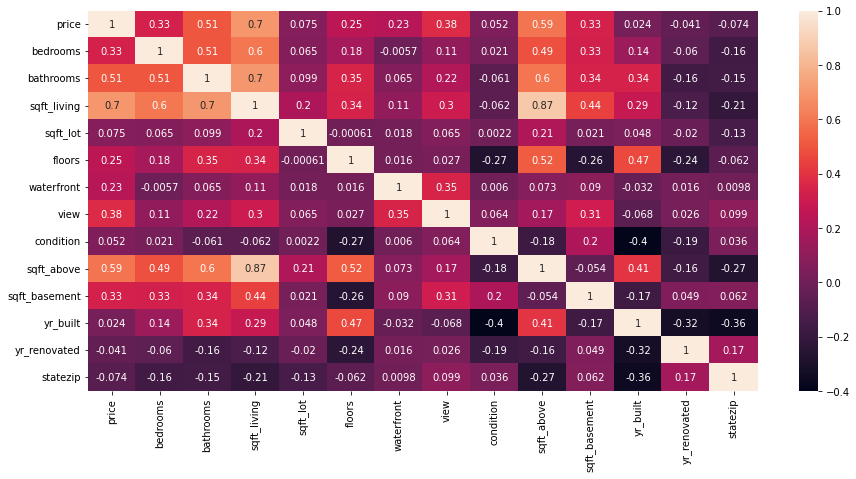

In [68]:
# Check the correlation to price. Negative correlation is ok to drop
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot = True)
plt.show()

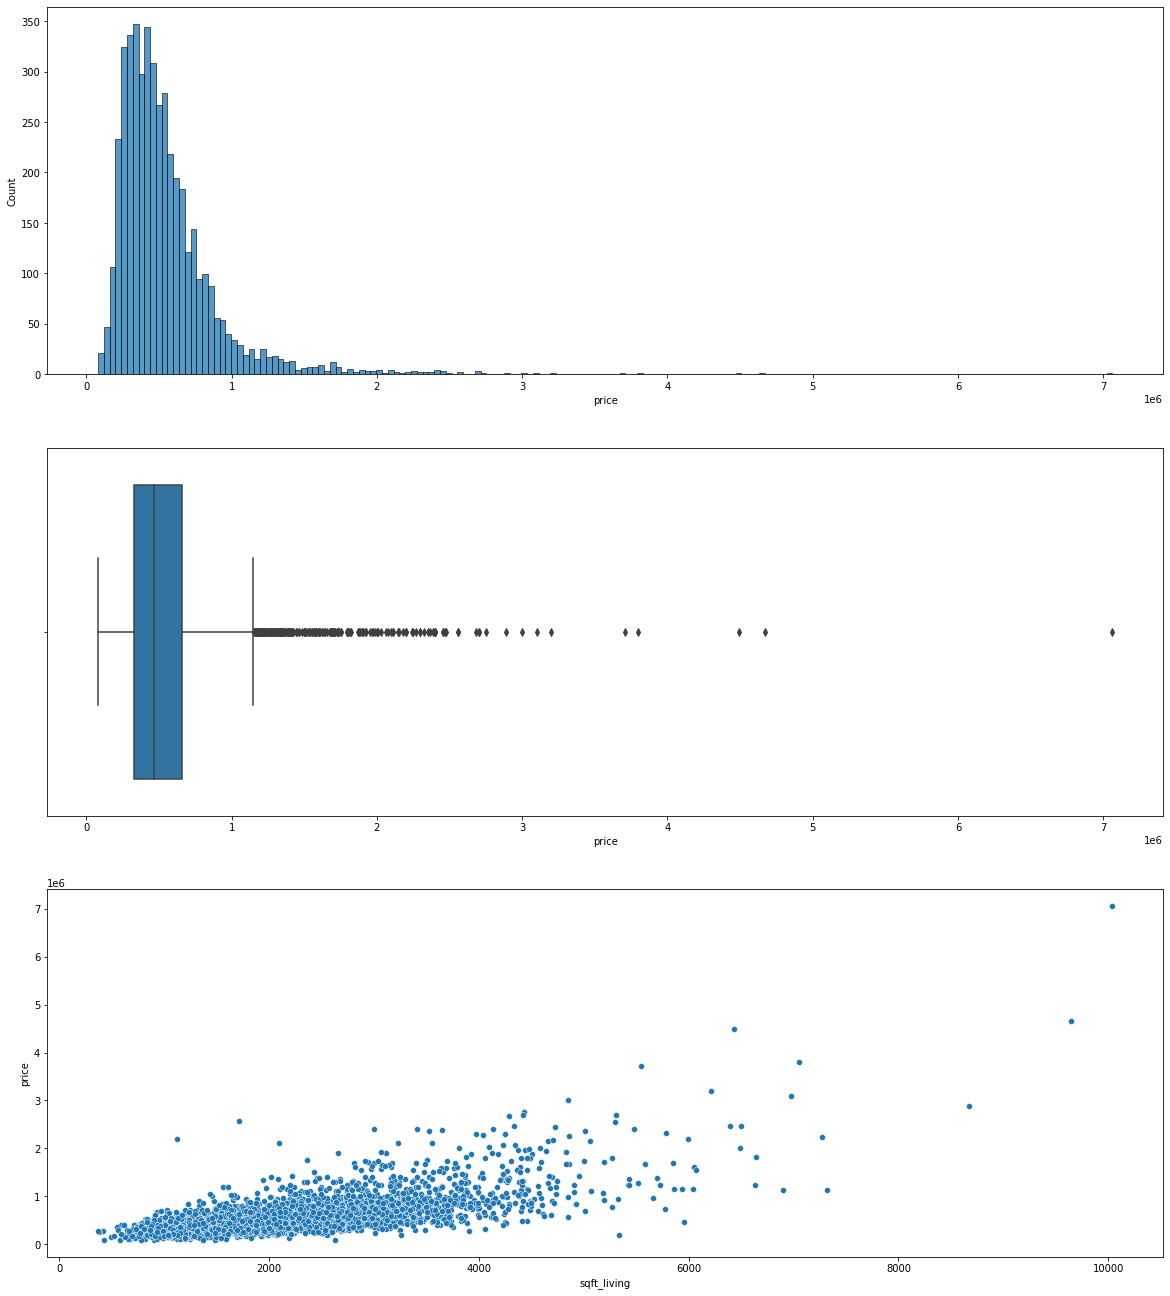

In [67]:
# Data spread by Price

f,ax = plt.subplots(3,1,figsize=(20,23))
sns.histplot(x = 'price',data=data, ax=ax[0])
sns.boxplot(x = 'price',data=data, ax=ax[1])
sns.scatterplot(x= 'sqft_living',y = 'price',data=data, ax=ax[2])

In [9]:
# Data with inconsistent values
data.loc[(data['price'] == 0)].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,2.0,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,3.0,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,3.0,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,4.0,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,2.0,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,98166,USA


In [10]:
# Data with inconsistent values
data.loc[(data['bedrooms'] == 0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,98102,USA
3209,2014-06-24 00:00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,98053,USA


In [11]:
# Check the outliers (most expensive)
data.sort_values(by=['price'],ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,98031,USA
4346,2014-06-23 00:00:00,12899000.0,3.0,2.0,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,98199,USA
2286,2014-06-11 00:00:00,7062500.0,5.0,4.0,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,98004,USA
2654,2014-06-17 00:00:00,4668000.0,5.0,7.0,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,98040,USA
2761,2014-06-18 00:00:00,4489000.0,4.0,3.0,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,98004,USA


In [12]:
# Comparing feature of the most expensive price with the same house in their neighborhood 
data.loc[(data['statezip']== 98031)].sort_values(by=['price'],ascending=False).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,98031,USA
1152,2014-05-22 00:00:00,430000.0,4.0,3.0,3220,8936,2.0,0,0,3,2450,770,1990,2009,20301 96th Ave S,Kent,98031,USA
3580,2014-06-27 00:00:00,399950.0,3.0,2.0,2570,10431,2.0,0,0,3,2570,0,1989,0,9531 S 204th Pl,Kent,98031,USA


In [13]:
# Comparing feature of 2nd most expensive price with the same house in their neighborhood
data.loc[(data['statezip']==98199)].sort_values(by=['price'],ascending=False).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4346,2014-06-23 00:00:00,12899000.00,3.0,2.0,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,98199,USA
4465,2014-06-05 00:00:00,2560498.33,3.0,2.0,1710,1664,2.0,0,0,5,1300,410,2003,0,2826 21st Ave W,Seattle,98199,USA
1355,2014-05-27 00:00:00,1655000.00,4.0,4.0,3080,4815,2.0,0,3,3,2300,780,1937,2009,2441-2499 Crane Dr W,Seattle,98199,USA


In [14]:
# Check the outliers (cheapest)
data.loc[(data['price'] > 0)].sort_values(by=['price']).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4351,2014-05-06 00:00:00,7800.0,2.0,1.0,780,16344,1.0,0,0,1,780,0,1942,0,4229 S 144th St,Tukwila,98168,USA
1219,2014-05-23 00:00:00,80000.0,1.0,1.0,430,5050,1.0,0,0,2,430,0,1912,0,32215 E Rutherford St,Carnation,98014,USA
1587,2014-05-29 00:00:00,83000.0,2.0,1.0,900,8580,1.0,0,0,3,900,0,1918,0,14440 51st Ave S,Tukwila,98168,USA


In [15]:
# Check the outliers (widest sqft_living)
data.sort_values(by=['sqft_living'],ascending=False).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
122,2014-05-05 00:00:00,2280000.0,7.0,8.0,13540,307752,3.0,0,4,3,9410,4130,1999,0,26408 NE 70th St,Redmond,98053,USA
2286,2014-06-11 00:00:00,7062500.0,5.0,4.0,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,98004,USA
2654,2014-06-17 00:00:00,4668000.0,5.0,7.0,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,98040,USA


In [16]:
# Create dataframe of missing datapoint by appending price = 0 and bedrooms = 0
missing = data.loc[(data['price'] == 0)].append(data.loc[(data['bedrooms'] == 0)])
# Create list that contains index of error datapoint
missing_index_list = missing.reset_index()['index'].to_list()
# Insert index of outliers
missing_index_list.extend([4351,4346,4350,122])
# Drop error datapoint
data = data.drop(missing_index_list,axis=0)

# Regression Modeling

In [70]:
# Split data to X for variable input, and y for target class
X = data.drop(['date','yr_renovated','country','price','street','statezip'],axis=1)
y = data['price']

In [71]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
# Encode
encoder = LabelEncoder()

features = X.select_dtypes(include=['object','bool']).columns
cat = list(features.values)
for i in cat:
  X_train[i] = encoder.fit_transform(X_train[i])
  X_test[i] = encoder.fit_transform(X_test[i])

## Linear Regression

In [73]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('coef of determination training ', reg.score(X_train, y_train))
print('coef of determination testing ', reg.score(X_test, y_test))
print()
print('coefficient')
print(reg.coef_)
print()
print('intercept')
print(reg.intercept_)
print()
reg_pred = list(reg.predict(X_test))
for i in reg_pred[0:10]:
  print('Prediction price of house', reg_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
reg_mae = reg.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, reg_mae))

coef of determination training  0.591049338415579
coef of determination testing  0.560906058691589

coefficient
[-5.30730807e+04  6.29355520e+04  1.69459378e+02 -5.24737853e-01
  5.91228468e+04  4.46675000e+05  5.75998397e+04  2.46941418e+04
  1.09005069e+02  6.04543095e+01 -2.58316826e+03  1.60500540e+03]

intercept
4888727.984525077

Prediction price of house 1 : $ 355291.21811967716
Prediction price of house 2 : $ 1116644.774894556
Prediction price of house 3 : $ 326496.86509459
Prediction price of house 4 : $ 288509.60303904675
Prediction price of house 5 : $ 329559.26589402556
Prediction price of house 6 : $ 272209.2237765854
Prediction price of house 7 : $ 924129.0037655579
Prediction price of house 8 : $ 507434.10280391574
Prediction price of house 9 : $ 924840.3823098419
Prediction price of house 10 : $ 269843.40809983015

Real price of house 1 : $ 395000.0
Real price of house 2 : $ 1505000.0
Real price of house 3 : $ 83000.0
Real price of house 4 : $ 262500.0
Real price of hou

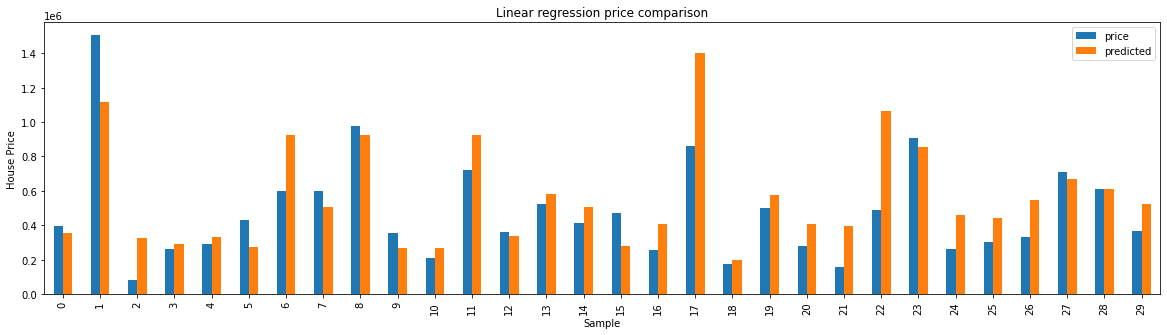

In [74]:
reg_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
reg_pred_price = pd.DataFrame(reg_pred[:30], columns = ['predicted'])
reg_result = pd.concat([reg_real_price, reg_pred_price], axis=1) 
reg_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## Laso

In [88]:
las = Lasso(alpha=0.5)
las.fit(X_train, y_train)

print('coef of determination training ', las.score(X_train, y_train))
print('coef of determination testing ', las.score(X_test, y_test))
print()
print('coefficient')
print(las.coef_)
print()
print('intercept')
print(las.intercept_)
print()
las_pred = list(las.predict(X_test))
for i in las_pred[0:10]:
  print('Prediction price of house', las_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
laso_mae = las.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, laso_mae))

coef of determination training  0.5910493380810136
coef of determination testing  0.5609060361586746

coefficient
[-5.30722956e+04  6.29339125e+04  2.92131208e+02 -5.24743238e-01
  5.91199764e+04  4.46590837e+05  5.76023233e+04  2.46924788e+04
 -1.36654621e+01 -6.22172583e+01 -2.58316099e+03  1.60502910e+03]

intercept
4888721.527070453

Prediction price of house 1 : $ 355293.3175440859
Prediction price of house 2 : $ 1116642.4494276773
Prediction price of house 3 : $ 326498.3682630621
Prediction price of house 4 : $ 288510.8127782829
Prediction price of house 5 : $ 329561.0070514865
Prediction price of house 6 : $ 272210.9801637735
Prediction price of house 7 : $ 924129.2138710357
Prediction price of house 8 : $ 507434.75804845616
Prediction price of house 9 : $ 924844.7000997621
Prediction price of house 10 : $ 269842.63485793304

Real price of house 1 : $ 395000.0
Real price of house 2 : $ 1505000.0
Real price of house 3 : $ 83000.0
Real price of house 4 : $ 262500.0
Real price of h

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.821e+13, tolerance: 4.213e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


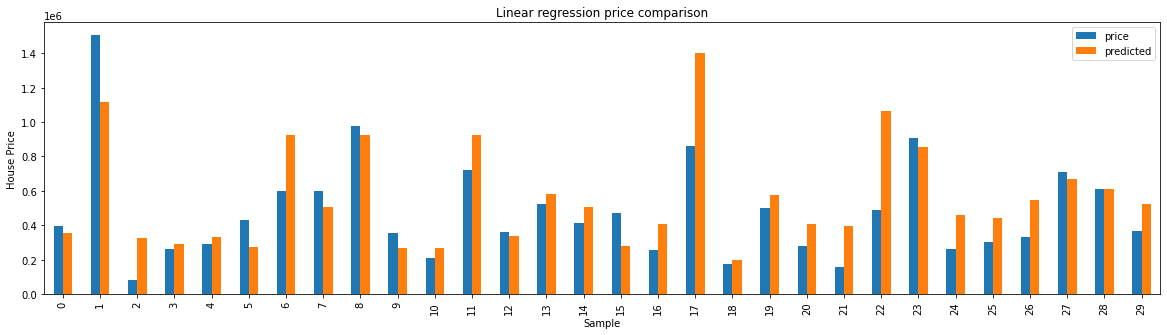

In [86]:
las_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
las_pred_price = pd.DataFrame(las_pred[:30], columns = ['predicted'])
las_result = pd.concat([las_real_price, las_pred_price], axis=1) 
las_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## Ridge

In [77]:
ri = Ridge(alpha=0.9)
ri.fit(X_train, y_train)

print('coef of determination training ', ri.score(X_train, y_train))
print('coef of determination testing ', ri.score(X_test, y_test))
print()
print('coefficient')
print(ri.coef_)
print()
print('intercept')
print(ri.intercept_)
print()
ri_pred = list(ri.predict(X_test))
for i in ri_pred[0:10]:
  print('Prediction price of house', ri_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
ri_mae = ri.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, ri_mae))

coef of determination training  0.5910303188186476
coef of determination testing  0.5607693066144042

coefficient
[-5.31336498e+04  6.28760359e+04  1.69494509e+02 -5.25683630e-01
  5.90168453e+04  4.25671137e+05  5.83890505e+04  2.46208482e+04
  1.09082342e+02  6.04124090e+01 -2.58360547e+03  1.60611459e+03]

intercept
4890074.279386825

Prediction price of house 1 : $ 355238.8599426048
Prediction price of house 2 : $ 1116548.2238439023
Prediction price of house 3 : $ 326629.91585833114
Prediction price of house 4 : $ 288527.81106406543
Prediction price of house 5 : $ 329606.1322301617
Prediction price of house 6 : $ 272338.848028373
Prediction price of house 7 : $ 923653.7287203418
Prediction price of house 8 : $ 507391.52527215425
Prediction price of house 9 : $ 924908.3847773355
Prediction price of house 10 : $ 269863.93667923193

Real price of house 1 : $ 395000.0
Real price of house 2 : $ 1505000.0
Real price of house 3 : $ 83000.0
Real price of house 4 : $ 262500.0
Real price of 

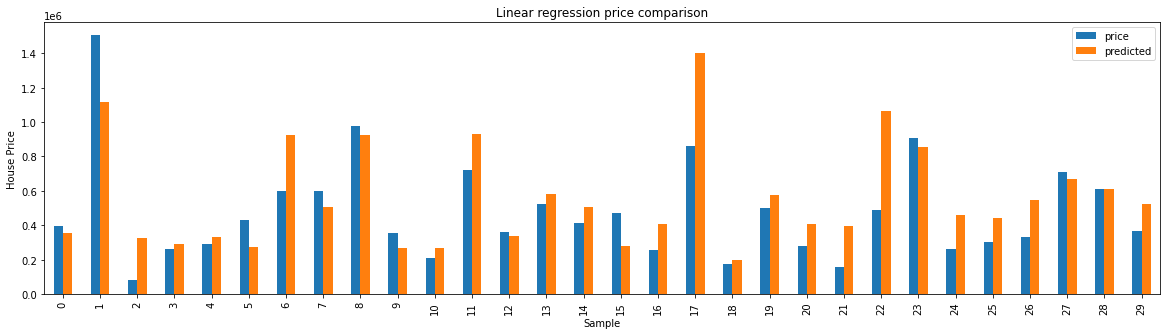

In [78]:
ri_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
ri_pred_price = pd.DataFrame(ri_pred[:30], columns = ['predicted'])
ri_result = pd.concat([ri_real_price, ri_pred_price], axis=1) 
ri_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## DecissionTree

In [79]:
dt = DecisionTreeRegressor(max_depth=18)
dt.fit(X_train, y_train)

print('coef of determination training ',dt.score(X_train, y_train))
print('coef of determination testing ',dt.score(X_test, y_test))
print()
print('prediction')
dt_pred = list(dt.predict(X_test))
for i in dt_pred[0:10]:
  print('Prediction price of house', dt_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
dt_mae = dt.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, dt_mae))

coef of determination training  0.9918639727839716
coef of determination testing  0.20493100603853143

prediction
Prediction price of house 1 : $ 236700.0
Prediction price of house 2 : $ 1570000.0
Prediction price of house 3 : $ 300350.0
Prediction price of house 4 : $ 375000.0
Prediction price of house 5 : $ 585000.0
Prediction price of house 6 : $ 250000.0
Prediction price of house 7 : $ 1500000.0
Prediction price of house 8 : $ 494000.0
Prediction price of house 9 : $ 862633.3333333334
Prediction price of house 10 : $ 90000.0

Real price of house 1 : $ 395000.0
Real price of house 2 : $ 1505000.0
Real price of house 3 : $ 83000.0
Real price of house 4 : $ 262500.0
Real price of house 5 : $ 289950.0
Real price of house 6 : $ 430000.0
Real price of house 7 : $ 599999.0
Real price of house 8 : $ 600000.0
Real price of house 9 : $ 975000.0
Real price of house 10 : $ 353250.0

Mean Absolute Error:  11481.70045597857


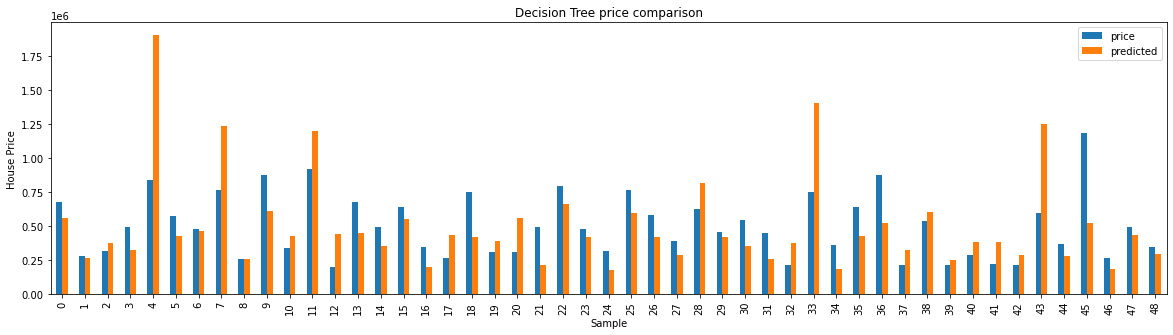

In [118]:
dt_real_price = pd.DataFrame(y_test[51:100]).reset_index(drop=True)
dt_pred_price = pd.DataFrame(dt_pred[51:100], columns = ['predicted'])
dt_result = pd.concat([dt_real_price, dt_pred_price], axis=1) 
dt_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## Random Forest

In [81]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('coef of determination training ',rf.score(X_train, y_train))
print('coef of determination testing ',rf.score(X_test, y_test))
print()
print('prediction')
rf_pred = list(rf.predict(X_test))
for i in rf_pred[0:10]:
  print('Prediction price of house', rf_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
rf_mae = rf.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, rf_mae))

coef of determination training  0.9493160705809712
coef of determination testing  0.5068439341770608

prediction
Prediction price of house 1 : $ 254538.5556
Prediction price of house 2 : $ 1174486.6664999998
Prediction price of house 3 : $ 271923.0
Prediction price of house 4 : $ 412584.12
Prediction price of house 5 : $ 522651.09
Prediction price of house 6 : $ 222112.0357
Prediction price of house 7 : $ 1134018.9637999998
Prediction price of house 8 : $ 607170.79
Prediction price of house 9 : $ 914926.0
Prediction price of house 10 : $ 226124.0

Real price of house 1 : $ 395000.0
Real price of house 2 : $ 1505000.0
Real price of house 3 : $ 83000.0
Real price of house 4 : $ 262500.0
Real price of house 5 : $ 289950.0
Real price of house 6 : $ 430000.0
Real price of house 7 : $ 599999.0
Real price of house 8 : $ 600000.0
Real price of house 9 : $ 975000.0
Real price of house 10 : $ 353250.0

Mean Absolute Error:  46216.88746701847


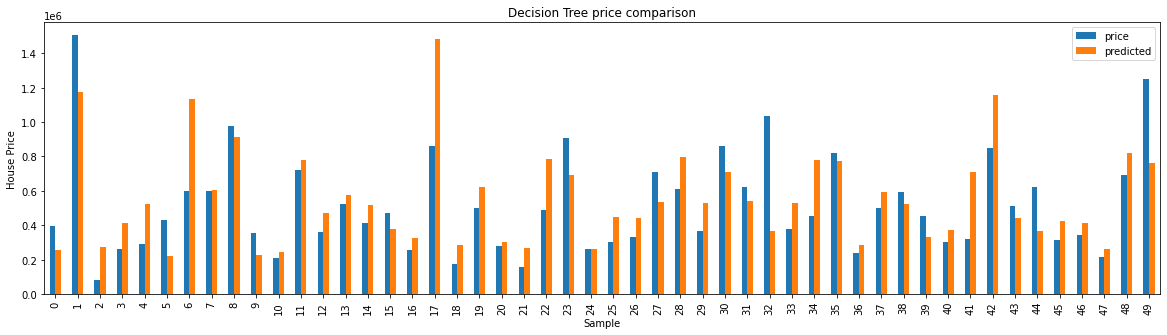

In [136]:
rf_real_price = pd.DataFrame(y_test[:50]).reset_index(drop=True)
rf_pred_price = pd.DataFrame(rf_pred[:50], columns = ['predicted'])
rf_result = pd.concat([rf_real_price, rf_pred_price], axis=1) 
rf_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## MLP Regressor

In [141]:
mlpr = MLPRegressor(hidden_layer_sizes=(2,100) ,max_iter=600)
mlpr.fit(X_train, y_train)

print('coef of determination training ',mlpr.score(X_train, y_train))
print('coef of determination testing ',mlpr.score(X_test, y_test))
print()
print('prediction')
mlpr_pred = list(mlpr.predict(X_test))
for i in mlpr_pred[0:10]:
  print('Prediction price of house', mlpr_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
mlpr_mae = mlpr.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, mlpr_mae))

coef of determination training  0.49606718853504783
coef of determination testing  0.4858007911190336

prediction
Prediction price of house 1 : $ 512364.93953238794
Prediction price of house 2 : $ 932034.6964442799
Prediction price of house 3 : $ 217034.7482031582
Prediction price of house 4 : $ 286179.8644036582
Prediction price of house 5 : $ 421987.5929413343
Prediction price of house 6 : $ 242087.15381371908
Prediction price of house 7 : $ 1033490.6771216644
Prediction price of house 8 : $ 611387.091806367
Prediction price of house 9 : $ 1136339.1305733554
Prediction price of house 10 : $ 262285.58277215285

Real price of house 1 : $ 395000.0
Real price of house 2 : $ 1505000.0
Real price of house 3 : $ 83000.0
Real price of house 4 : $ 262500.0
Real price of house 5 : $ 289950.0
Real price of house 6 : $ 430000.0
Real price of house 7 : $ 599999.0
Real price of house 8 : $ 600000.0
Real price of house 9 : $ 975000.0
Real price of house 10 : $ 353250.0

Mean Absolute Error:  172699

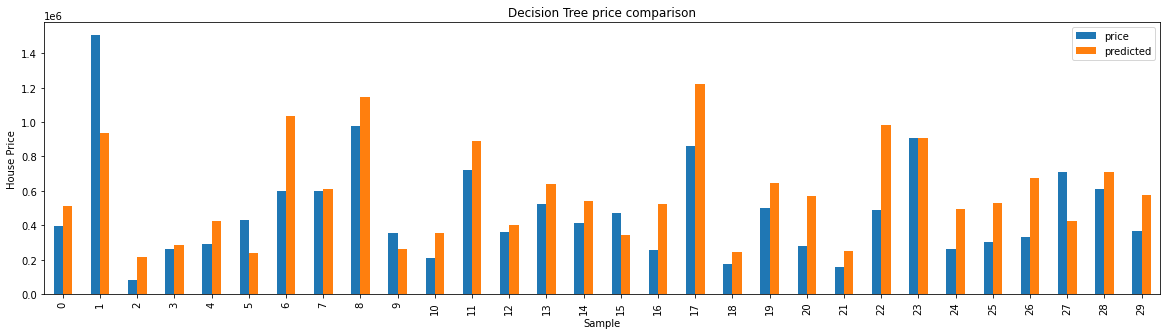

In [134]:
mlpr_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
mlpr_pred_price = pd.DataFrame(mlpr_pred[:30], columns = ['predicted'])
mlpr_result = pd.concat([mlpr_real_price, mlpr_pred_price], axis=1) 
mlpr_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()